# CREDITWORTHINESS (Project by : Muhammad Saim Alam Khan)

# Libraries: 

Here we are loading all the required libraries in order to solve this project

In [1]:
#Loading all the Libraries to be used

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.compat import StringIO

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,roc_curve,plot_roc_curve
from sklearn.metrics import confusion_matrix, plot_roc_curve, auc, plot_precision_recall_curve


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Data Loading and Exploration:

In this part we are loading the data from the file and exploring the different features and if their are some missing values present or not.

In [2]:
#Loading the Dataset as Pandas Dataframe and provide suitable Column Names

df = pd.read_csv('kredit.dat', sep="\t",
                 header  = None,
                 names = ['status','duration','credit_history','purpose','credit_amount','savings_account/bonds',
                          'present_employement_since','installment_rate','personal_status_and_sex','other_debtors/guarantors',
                          'present_residence_since','property','age','other_installment_plans','housing',
                          'number_of_existing_credits','job','number_of_people_being_liable','telephone','foreign_worker',
                          'creditworthy'])

In [3]:
#Checking the data first thoroughly

df.head()

,status,duration,credit_history,purpose,credit_amount,savings_account/bonds,present_employement_since,installment_rate,personal_status_and_sex,other_debtors/guarantors,...,property,age,other_installment_plans,housing,number_of_existing_credits,job,number_of_people_being_liable,telephone,foreign_worker,creditworthy
0,A14,36,A32,?,2299,A63,?,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,?,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,?,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,?,2,A191,?,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


In [4]:
#Replacing '?' symbol with NaN so that we can detect missing values easily in next steps

df.replace('?', np.NaN, inplace = True)
df.head()

,status,duration,credit_history,purpose,credit_amount,savings_account/bonds,present_employement_since,installment_rate,personal_status_and_sex,other_debtors/guarantors,...,property,age,other_installment_plans,housing,number_of_existing_credits,job,number_of_people_being_liable,telephone,foreign_worker,creditworthy
0,A14,36,A32,NaN,2299,A63,NaN,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,NaN,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,NaN,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,NaN,2,A191,NaN,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


In [5]:
#Check the information regarding the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
status                           1000 non-null object
duration                         1000 non-null int64
credit_history                   1000 non-null object
purpose                          827 non-null object
credit_amount                    1000 non-null int64
savings_account/bonds            1000 non-null object
present_employement_since        504 non-null object
installment_rate                 1000 non-null int64
personal_status_and_sex          1000 non-null object
other_debtors/guarantors         1000 non-null object
present_residence_since          1000 non-null int64
property                         1000 non-null object
age                              1000 non-null int64
other_installment_plans          1000 non-null object
housing                          1000 non-null object
number_of_existing_credits       1000 non-null int64
job                              768 n

In [6]:
#Checking the total missing values in the data

df.isna().sum()

status                             0
duration                           0
credit_history                     0
purpose                          173
credit_amount                      0
savings_account/bonds              0
present_employement_since        496
installment_rate                   0
personal_status_and_sex            0
other_debtors/guarantors           0
present_residence_since            0
property                           0
age                                0
other_installment_plans            0
housing                            0
number_of_existing_credits         0
job                              232
number_of_people_being_liable      0
telephone                          0
foreign_worker                   360
creditworthy                       0
dtype: int64

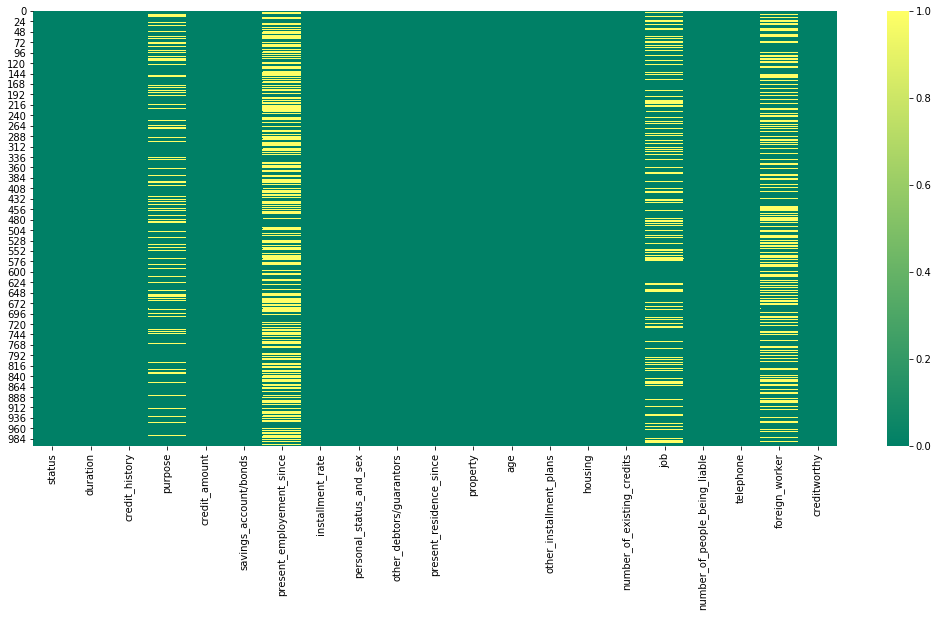

In [7]:
#Check the missing values through Heatmap

plt.figure(figsize = (18,8))
sns.heatmap(df.isna(), cmap="summer")

# Missing Values Imputation and One Hot Encoding:

In this part we are going to handle missing values by first converting the non missing value columns to one hot encoded for and missing value columns to manual numerical data conversion so that we can apply an iterative imputer with Linear Regressor to impute the missing values

In [8]:
#Since we have missing values in 4 columns only so we will substitute values in these columns to numbers so that we can use 
#Linear/Logical Regression to Impute missing values

#Make 4 dictionaries for the 4 Columns

dict_purpose = {'A40':0 , 'A41':1 ,'A42':2 ,'A43':3 ,'A44':4 ,'A45':5 ,'A46':6 ,'A47':7 ,'A48':8 ,'A49':9 ,'A410':10}
dict_pes     = {'A71':1 ,'A72':2 ,'A73':3 ,'A74':4 ,'A75':5}
dict_job     = {'A171':1 ,'A172':2 ,'A173':3 ,'A174':4 ,'A175':5}
dict_fw      = {'A201':1 ,'A202':2}


In [9]:
#Apply the dictionary transformation to the 4 columns

df['purpose'] = df['purpose'].map(dict_purpose)
df['present_employement_since'] = df['present_employement_since'].map(dict_pes)
df['job'] = df['job'].map(dict_job)
df['foreign_worker'] = df['foreign_worker'].map(dict_fw)


In [10]:
#Convert remaining column containing alphanumeric values to dummy numerical values so that we can 
#apply Linear/Logical Regression on it 

dummy_columns = ['status','credit_history','savings_account/bonds','personal_status_and_sex','other_debtors/guarantors','property','other_installment_plans','housing','telephone']
dummy_values  = pd.get_dummies(df[dummy_columns])

df.drop(dummy_columns, axis = 1, inplace= True)
df = pd.concat([df, dummy_values], axis = 1)

df.head()

,duration,purpose,credit_amount,present_employement_since,installment_rate,present_residence_since,age,number_of_existing_credits,job,number_of_people_being_liable,...,property_A123,property_A124,other_installment_plans_A141,other_installment_plans_A142,other_installment_plans_A143,housing_A151,housing_A152,housing_A153,telephone_A191,telephone_A192
0,36,NaN,2299,NaN,4,4,39,1,3.0,1,...,1,0,0,0,1,0,1,0,1,0
1,18,6.0,1239,3.0,4,4,61,1,NaN,1,...,0,1,0,0,1,0,0,1,1,0
2,24,0.0,947,4.0,4,3,38,1,NaN,2,...,0,1,1,0,0,0,0,1,1,0
3,15,3.0,1478,3.0,4,3,33,2,3.0,1,...,0,0,1,0,0,0,1,0,1,0
4,24,0.0,1525,4.0,4,3,34,1,3.0,2,...,1,0,0,0,1,0,1,0,0,1


In [11]:
#We will use a Iterative Imputer and will use Linear Regression algorithm to impute missing values

imputer = IterativeImputer(estimator=LinearRegression())
new_df = imputer.fit(df)
final_df = pd.DataFrame(np.round(imputer.transform(df)) , columns = df.columns)


final_df.head()

,duration,purpose,credit_amount,present_employement_since,installment_rate,present_residence_since,age,number_of_existing_credits,job,number_of_people_being_liable,...,property_A123,property_A124,other_installment_plans_A141,other_installment_plans_A142,other_installment_plans_A143,housing_A151,housing_A152,housing_A153,telephone_A191,telephone_A192
0,36.0,3.0,2299.0,4.0,4.0,4.0,39.0,1.0,3.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,18.0,6.0,1239.0,3.0,4.0,4.0,61.0,1.0,3.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,24.0,0.0,947.0,4.0,4.0,3.0,38.0,1.0,3.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,15.0,3.0,1478.0,3.0,4.0,3.0,33.0,2.0,3.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.0,0.0,1525.0,4.0,4.0,3.0,34.0,1.0,3.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [12]:
#Create reverse dictionaries for the 4 columns whose data was imputed

dict_purpose_rev = {v: k for k, v in dict_purpose.items()}
dict_pes_rev = {v: k for k, v in dict_pes.items()}
dict_job_rev = {v: k for k, v in dict_job.items()}
dict_fw_rev = {v: k for k, v in dict_fw.items()}

In [13]:
#Apply the dictionary reverse transformation to the imputed data columns

final_df['purpose'] = final_df['purpose'].map(dict_purpose_rev)
final_df['present_employement_since'] = final_df['present_employement_since'].map(dict_pes_rev)
final_df['job'] = final_df['job'].map(dict_job_rev)
final_df['foreign_worker'] = final_df['foreign_worker'].map(dict_fw_rev)

In [14]:
#Converting the remaining columns to dummy values for final Prediction Problem 

dummy_columns = ['purpose','present_employement_since','job','foreign_worker']
dummy_values  = pd.get_dummies(final_df[dummy_columns])

final_df.drop(dummy_columns, axis = 1, inplace= True)
final_df = pd.concat([final_df, dummy_values], axis = 1)

final_df.head()

,duration,credit_amount,installment_rate,present_residence_since,age,number_of_existing_credits,number_of_people_being_liable,creditworthy,status_A11,status_A12,...,present_employement_since_A72,present_employement_since_A73,present_employement_since_A74,present_employement_since_A75,job_A171,job_A172,job_A173,job_A174,foreign_worker_A201,foreign_worker_A202
0,36.0,2299.0,4.0,4.0,39.0,1.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0
1,18.0,1239.0,4.0,4.0,61.0,1.0,1.0,1.0,0.0,1.0,...,0,1,0,0,0,0,1,0,1,0
2,24.0,947.0,4.0,3.0,38.0,1.0,2.0,2.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0
3,15.0,1478.0,4.0,3.0,33.0,2.0,1.0,1.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0
4,24.0,1525.0,4.0,3.0,34.0,1.0,2.0,1.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0


In [15]:
#Final dataset contains no missing values

final_df.isna().sum()

duration                         0
credit_amount                    0
installment_rate                 0
present_residence_since          0
age                              0
number_of_existing_credits       0
number_of_people_being_liable    0
creditworthy                     0
status_A11                       0
status_A12                       0
status_A13                       0
status_A14                       0
credit_history_A30               0
credit_history_A31               0
credit_history_A32               0
credit_history_A33               0
credit_history_A34               0
savings_account/bonds_A61        0
savings_account/bonds_A62        0
savings_account/bonds_A63        0
savings_account/bonds_A64        0
savings_account/bonds_A65        0
personal_status_and_sex_A91      0
personal_status_and_sex_A92      0
personal_status_and_sex_A93      0
personal_status_and_sex_A94      0
other_debtors/guarantors_A101    0
other_debtors/guarantors_A102    0
other_debtors/guaran

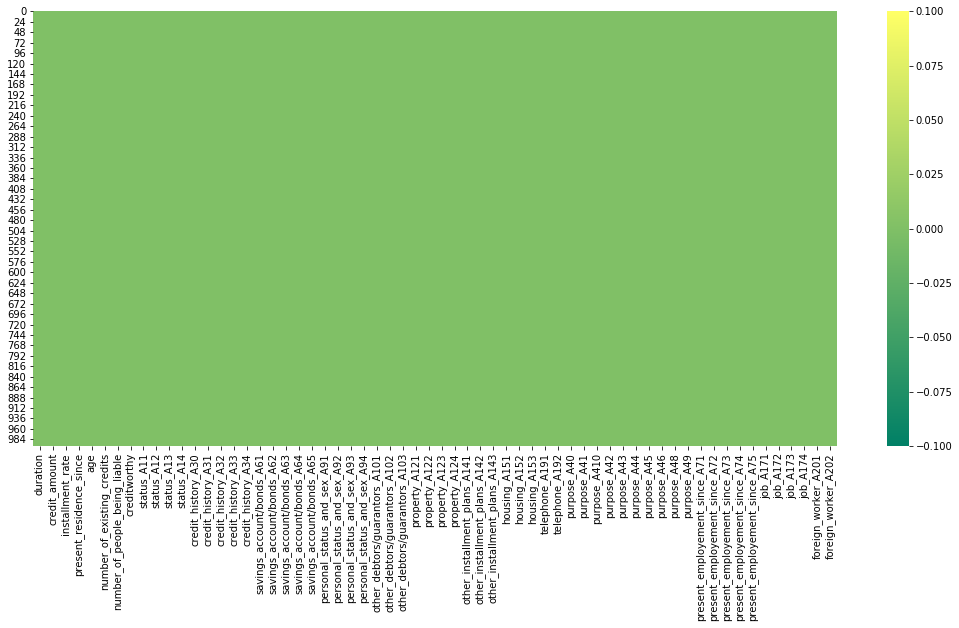

In [16]:
#Check the missing values through Heatmap

plt.figure(figsize = (18,8))
sns.heatmap(final_df.isna(), cmap="summer")

# Classifier Selection, Training and Evaluation Metrics

In this section we are going to select some classifiers to classify our data and we are going to train those classifiers and split and use our data to train and evaluate the classifiers


In [17]:
#Definine multiple Machine Learning Models

Models = {
          'Model_LC'  : LogisticRegression(max_iter = 1000),
          'Model_DTC' : DecisionTreeClassifier(criterion='entropy', random_state = 42),
          'Model_RFC' : RandomForestClassifier(n_estimators=1500, random_state = 42),
          'Model_SVC' : LinearSVC(dual = False)
         }

In [18]:
#Splitting Data into samples and labels and training and test splits

X = final_df.loc[:, final_df.columns != 'creditworthy']
y = final_df.loc[:, final_df.columns == 'creditworthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = True)

In [19]:
#Fit the model on training data and evaluate the model

accuracies  = []
precisions  = []
recalls     = []
cscores     = []
TPRs        = []
FPRs        = []
TPRP        = []
FPRP        = []

model_names = []
kfold = KFold(n_splits=10)


for key in Models.keys():
    Models[key].fit(X_train,np.ravel(y_train))
    
    accuracy  = accuracy_score(Models[key].predict(X_test), np.ravel(y_test))
    precision = precision_score(Models[key].predict(X_test), np.ravel(y_test))
    recall    = recall_score(Models[key].predict(X_test), np.ravel(y_test))
    crv       = cross_val_score(Models[key], X_test, np.ravel(y_test), cv=kfold).mean()
    TPR, FPR,_ = roc_curve(Models[key].predict(X_test), np.ravel(y_test), pos_label = 2)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    cscores.append(crv)
    model_names.append(key)
    TPRs.append(TPR.mean())
    FPRs.append(FPR.mean())
    TPRP.append(TPR)
    FPRP.append(FPR)
    
    
    print("\n%s :\nAccuracy = %s"%(key , accuracy))
    print("Precision Score = %s"%(precision))
    print("Recall Score = %s"%(recall))
    print("Cross Validation Score = %s"%(crv))
    print("TPR = %s"%(TPR.mean()))
    print("FPR = %s"%(FPR.mean()))
    


Model_LC :
Accuracy = 0.8
Precision Score = 0.8791946308724832
Recall Score = 0.8562091503267973
Cross Validation Score = 0.745
TPR = 0.38126361655773416
FPR = 0.5390070921985816

Model_DTC :
Accuracy = 0.75
Precision Score = 0.7919463087248322
Recall Score = 0.8613138686131386
Cross Validation Score = 0.67
TPR = 0.3795620437956204
FPR = 0.5026455026455027

Model_RFC :
Accuracy = 0.835
Precision Score = 0.9395973154362416
Recall Score = 0.8536585365853658
Cross Validation Score = 0.74
TPR = 0.38211382113821135
FPR = 0.5833333333333334

Model_SVC :
Accuracy = 0.79
Precision Score = 0.8590604026845637
Recall Score = 0.8590604026845637
Cross Validation Score = 0.705
TPR = 0.3803131991051454
FPR = 0.5294117647058824


# Classifier Comparision and Evaluation

In this section we go through the evaluation metrics and compare our classifiers

In [20]:
#Create a DataFrame of the results according to Models

df_results = pd.DataFrame(list(zip(['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','SVM Classifier'], accuracies,precisions, recalls, cscores, TPRs, FPRs)), columns = ['Models', 'Accuracies', 'Precisions', 'Recalls', 'Cross Validation Scores', 'True Positive Rate', 'False Positive Rate'])
df_results

,Models,Accuracies,Precisions,Recalls,Cross Validation Scores,True Positive Rate,False Positive Rate
0,Logistic Regression,0.800,0.879195,0.856209,0.745,0.381264,0.539007
1,Decision Tree Classifier,0.750,0.791946,0.861314,0.670,0.379562,0.502646
2,Random Forest Classifier,0.835,0.939597,0.853659,0.740,0.382114,0.583333
3,SVM Classifier,0.790,0.859060,0.859060,0.705,0.380313,0.529412


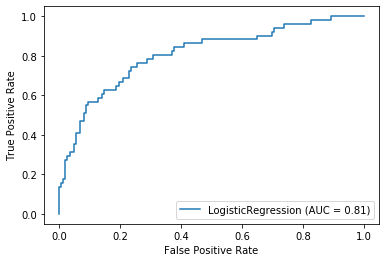

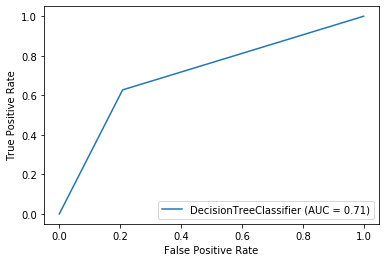

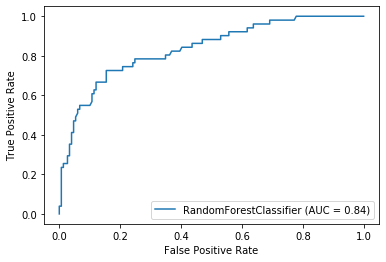

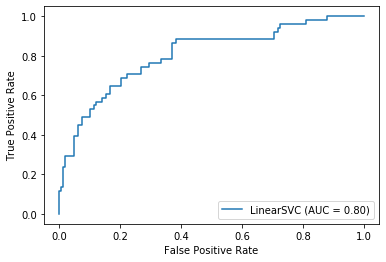

In [21]:
#Draw ROC Curves for all the different Models

for key in Models.keys():
    plot_roc_curve(Models[key], X_test, y_test)
    plt.figsize=(10,20)

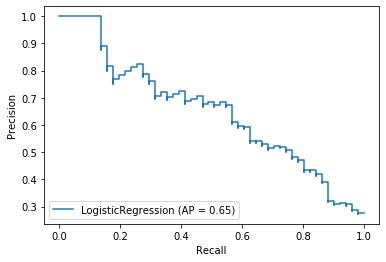

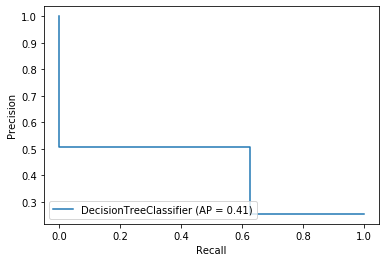

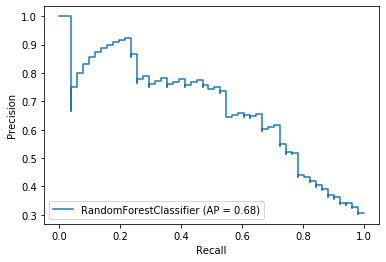

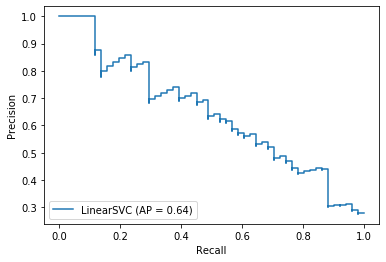

In [22]:
#Draw ROC Curves for all the different Models

for key in Models.keys():
    plot_precision_recall_curve(Models[key], X_test, y_test)
    plt.figsize=(10,20)

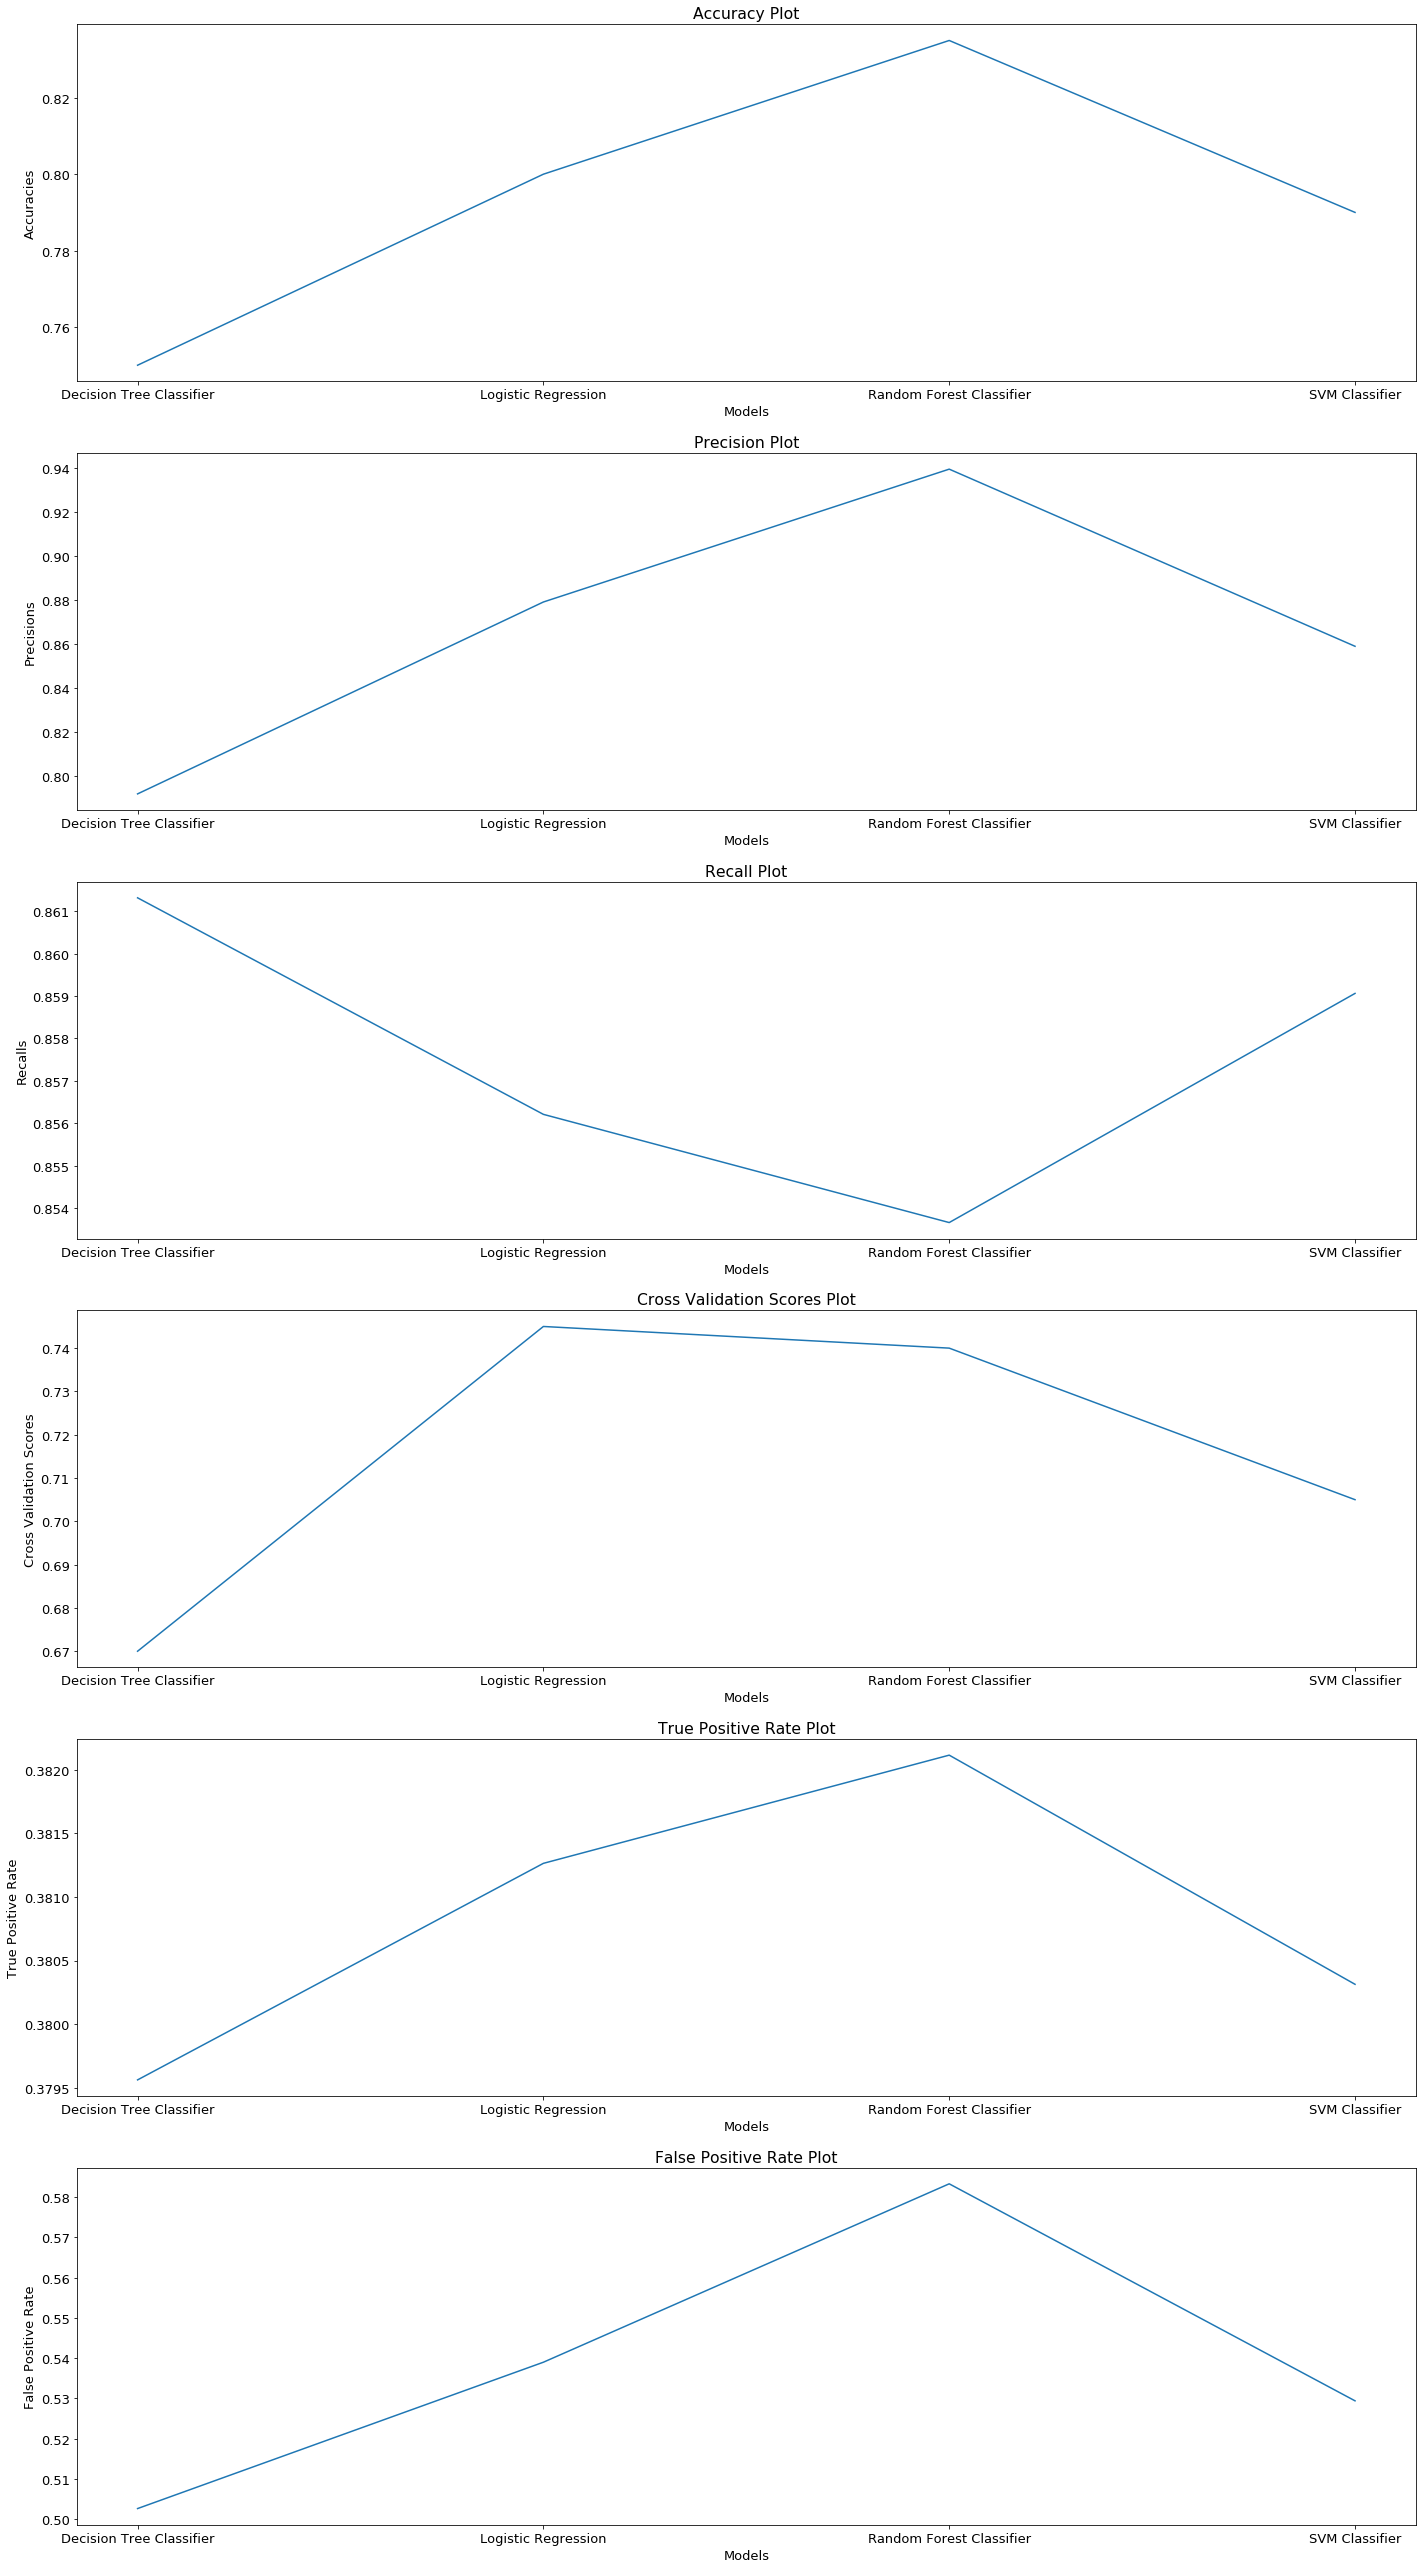

In [23]:
fig = plt.figure(figsize = (24,46))
plt.rcParams.update({'font.size': 13})
ax = fig.add_subplot(611)
ax.set_title('Accuracy Plot')
ax = sns.lineplot(x = 'Models',
            y = 'Accuracies',
            data = df_results)

ax = fig.add_subplot(612)
ax.title.set_text('Precision Plot')
ax = sns.lineplot(x = 'Models',
            y = 'Precisions',
            data = df_results)
 
ax = fig.add_subplot(613)
ax.title.set_text('Recall Plot')
ax = sns.lineplot(x = 'Models',
            y = 'Recalls',
            data = df_results)


ax = fig.add_subplot(614)
ax.title.set_text('Cross Validation Scores Plot')
ax = sns.lineplot(x = 'Models',
            y = 'Cross Validation Scores',
            data = df_results)


ax = fig.add_subplot(615)
ax.title.set_text('True Positive Rate Plot')
ax = sns.lineplot(x = 'Models',
            y = 'True Positive Rate',
            data = df_results)

ax = fig.add_subplot(616)
ax.title.set_text('False Positive Rate Plot')
ax = sns.lineplot(x = 'Models',
            y = 'False Positive Rate',
            data = df_results)

# Show the plot

plt.show()